In [58]:
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

Path.cwd()

PosixPath('/home/francesco/FisMedLab/Spettroscopiagamma')

In [59]:
Cs137cal = np.loadtxt('Cs137cal2.Spe')
Ba133cal = np.loadtxt('Ba133cal.Spe')
Am241cal = np.loadtxt('Am241cal.Spe')
Co60cal = np.loadtxt('Co60cal.Spe')
Na22cal = np.loadtxt('Na22cal.Spe')

back=np.loadtxt('fondo.Spe')


In [60]:
x=np.linspace(1,2048,2048)

#NORMALIZZO TUTTO
Cs137cal_norm= Cs137cal / (np.max(Cs137cal)*770)
Ba133cal_norm= Ba133cal /( np.max(Ba133cal)*564)
Co60cal_norm= Co60cal / (np.max(Co60cal)*2230)
Am241cal_norm= Am241cal / (np.max(Am241cal)*102)
Na22cal_norm= Na22cal / (np.max(Na22cal)*2063)

back_norm= back / (np.max(back)*92163)

Cs137clean=Cs137cal_norm-back_norm
Am241clean=Am241cal_norm-back_norm
Co60clean=Co60cal_norm-back_norm
Ba133clean=Ba133cal_norm-back_norm
Na22clean=Na22cal_norm-back_norm

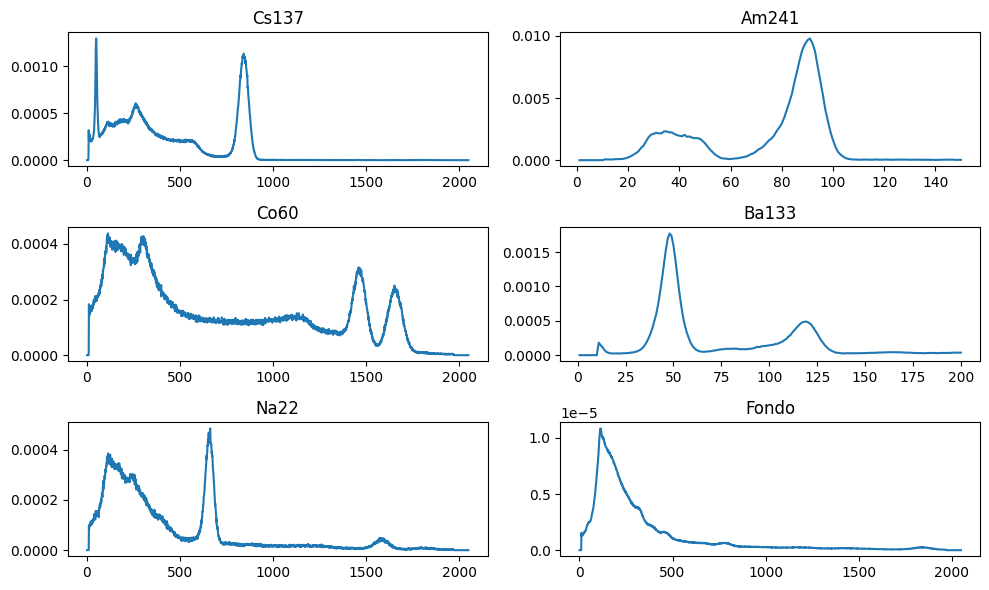

In [61]:
fig, ax=plt.subplots(3,2,figsize=(10,6))
ax[0,0].plot(x,Cs137clean)
ax[0,0].set_title('Cs137')
ax[0,1].plot(x[0:150],Am241clean[0:150])
ax[0,1].set_title('Am241')
ax[1,0].plot(x,Co60clean)
ax[1,0].set_title('Co60')
ax[1,1].plot(x[0:200],Ba133clean[0:200])
ax[1,1].set_title('Ba133')
ax[2,0].plot(x,Na22clean)
ax[2,0].set_title('Na22')
ax[2,1].plot(x,back_norm)
ax[2,1].set_title('Fondo')
plt.tight_layout()

Americio

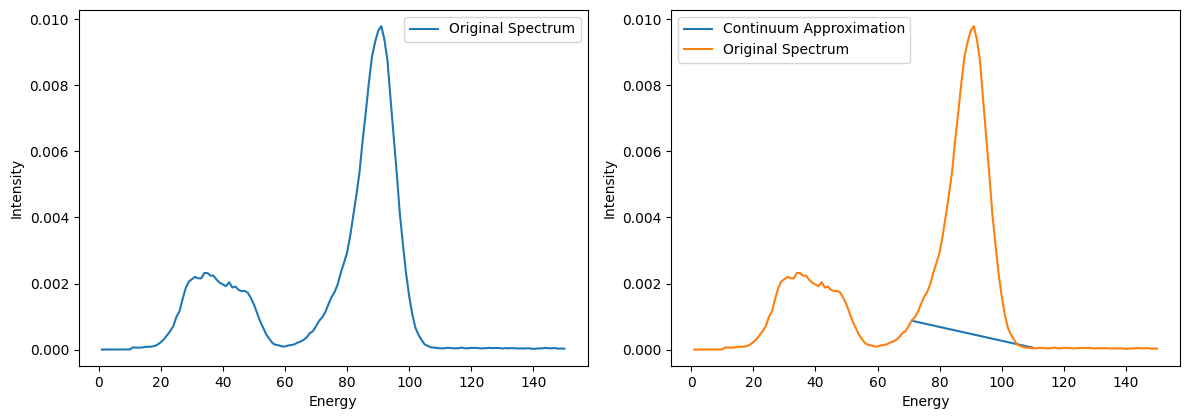

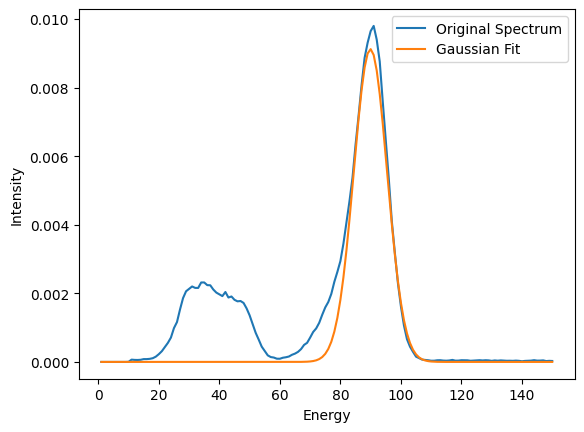

In [62]:
x=np.linspace(1,2048,2048)

x=x[0:150]
energy=x
Am241clean=Am241clean[0:150]
intensity=Am241clean


def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean)**2 / (2 * stddev**2))

Ca_index = 70
Cb_index = 110

Ca_intensity = intensity[Ca_index]
Cb_intensity = intensity[Cb_index]

continuum_slope = (Cb_intensity - Ca_intensity) / (Cb_index - Ca_index)

continuum_approximation = Ca_intensity + continuum_slope * (energy - energy[Ca_index])
continuum_approximation[:Ca_index] = 0
continuum_approximation[Cb_index:] = 0

subtracted_spectrum = intensity - continuum_approximation
subtracted_spectrum[:Ca_index] = 0
subtracted_spectrum[Cb_index:] = 0

initial_params = [np.max(subtracted_spectrum), (Ca_index + Cb_index) / 2, 1.0]
fit_params, cov = curve_fit(gaussian, energy, subtracted_spectrum, p0=initial_params)
amplitude_fit, mean_fit, stddev_fit = fit_params
gaussian_fit = gaussian(energy, amplitude_fit, mean_fit, stddev_fit)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(energy[Ca_index:Cb_index], continuum_approximation[Ca_index:Cb_index], label='Continuum Approximation')
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

# Subtracted Spectrum
#plt.subplot(2, 2, 3)
#plt.plot(energy, subtracted_spectrum, label='Subtracted Spectrum')
#plt.xlabel('Energy')
#plt.ylabel('Intensity')
#plt.legend()
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, gaussian_fit, label='Gaussian Fit')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()
plt.show()




Cobalto

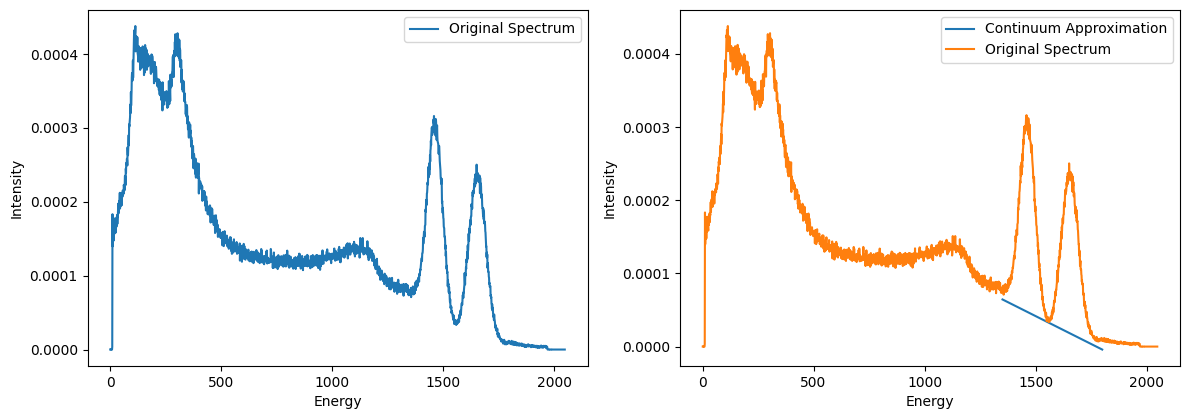

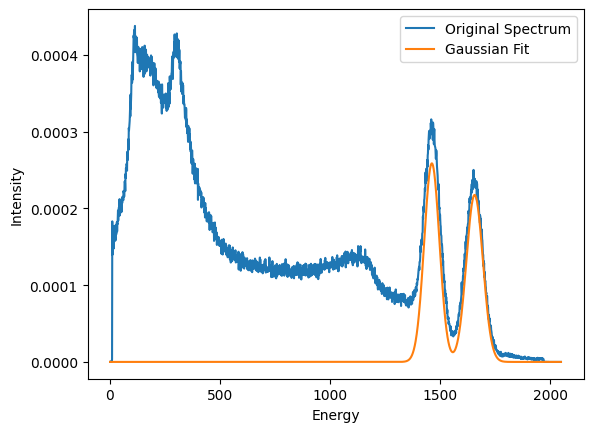

In [85]:
x=np.linspace(1,2048,2048)

energy=x
Co60clean=Co60clean
intensity=Co60clean


def gaussian(x, amplitude1, mean1, stddev1, amplitude2, mean2, stddev2):
    return amplitude1 * np.exp(-(x - mean1)**2 / (2 * stddev1**2)) + amplitude2 * np.exp(-(x - mean2)**2 / (2 * stddev2**2))

Ca_index = 1350
Cb_index = 1800

Ca_intensity = intensity[Ca_index]
Cb_intensity = intensity[Cb_index]

continuum_slope = (Cb_intensity - Ca_intensity) / (Cb_index - Ca_index)

continuum_approximation = (Ca_intensity-0.000015) + continuum_slope * (energy - energy[Ca_index])
continuum_approximation[:Ca_index] = 0
continuum_approximation[Cb_index:] = 0

subtracted_spectrum = intensity - continuum_approximation
subtracted_spectrum[:Ca_index] = 0
subtracted_spectrum[Cb_index:] = 0

initial_params = [0.0003, 1450, 20,0.00028,1600,20]
fit_params, cov = curve_fit(gaussian, energy, subtracted_spectrum, p0=initial_params)
amplitude_fit1, mean_fit1, stddev_fit1,amplitude_fit2,mean_fit2,stddev_fit2 = fit_params
gaussian_fit = gaussian(energy, amplitude_fit1, mean_fit1, stddev_fit1,amplitude_fit2,mean_fit2,stddev_fit2)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(energy[Ca_index:Cb_index], continuum_approximation[Ca_index:Cb_index], label='Continuum Approximation')
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

# Subtracted Spectrum
#plt.subplot(2, 2, 3)
#plt.plot(energy, subtracted_spectrum, label='Subtracted Spectrum')
#plt.xlabel('Energy')
#plt.ylabel('Intensity')
#plt.legend()
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, gaussian_fit, label='Gaussian Fit')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()
plt.show()

Cesio

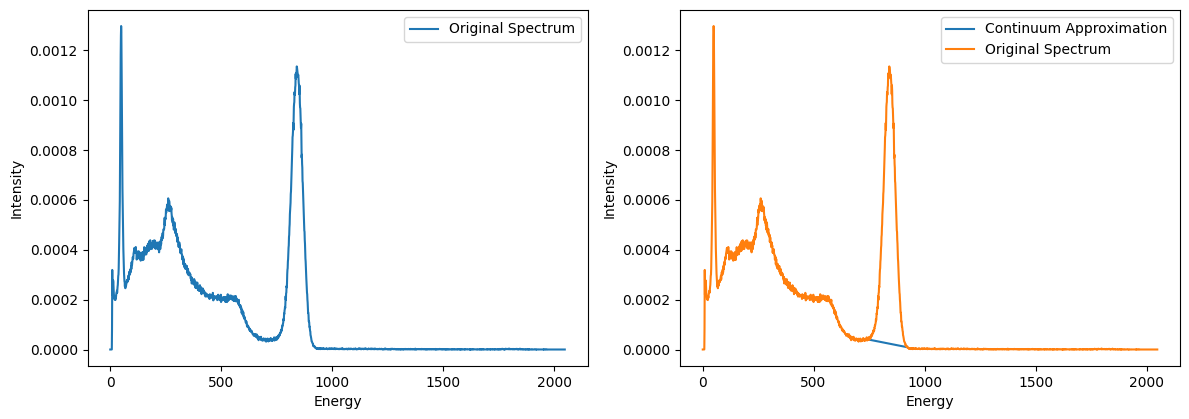

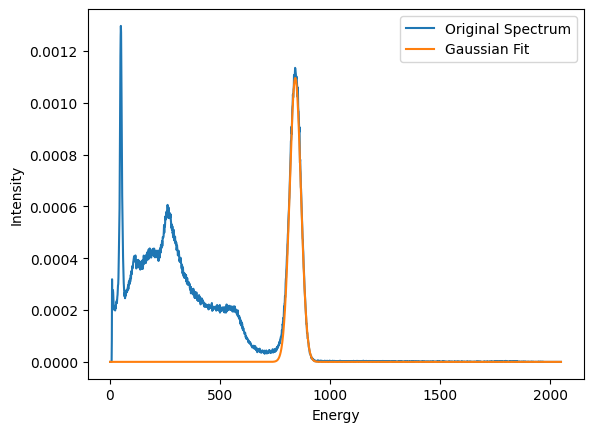

In [87]:
x=np.linspace(1,2048,2048)


energy=x
Cs137clean=Cs137clean
intensity=Cs137clean


def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean)**2 / (2 * stddev**2))

Ca_index = 750
Cb_index = 920

Ca_intensity = intensity[Ca_index]
Cb_intensity = intensity[Cb_index]

continuum_slope = (Cb_intensity - Ca_intensity) / (Cb_index - Ca_index)

continuum_approximation = Ca_intensity + continuum_slope * (energy - energy[Ca_index])
continuum_approximation[:Ca_index] = 0
continuum_approximation[Cb_index:] = 0

subtracted_spectrum = intensity - continuum_approximation
subtracted_spectrum[:Ca_index] = 0
subtracted_spectrum[Cb_index:] = 0

initial_params = [np.max(subtracted_spectrum), (Ca_index + Cb_index) / 2, 1.0]
fit_params, cov = curve_fit(gaussian, energy, subtracted_spectrum, p0=initial_params)
amplitude_fit, mean_fit, stddev_fit = fit_params
gaussian_fit = gaussian(energy, amplitude_fit, mean_fit, stddev_fit)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(energy[Ca_index:Cb_index], continuum_approximation[Ca_index:Cb_index], label='Continuum Approximation')
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

# Subtracted Spectrum
#plt.subplot(2, 2, 3)
#plt.plot(energy, subtracted_spectrum, label='Subtracted Spectrum')
#plt.xlabel('Energy')
#plt.ylabel('Intensity')
#plt.legend()
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, gaussian_fit, label='Gaussian Fit')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()
plt.show()

Sodio

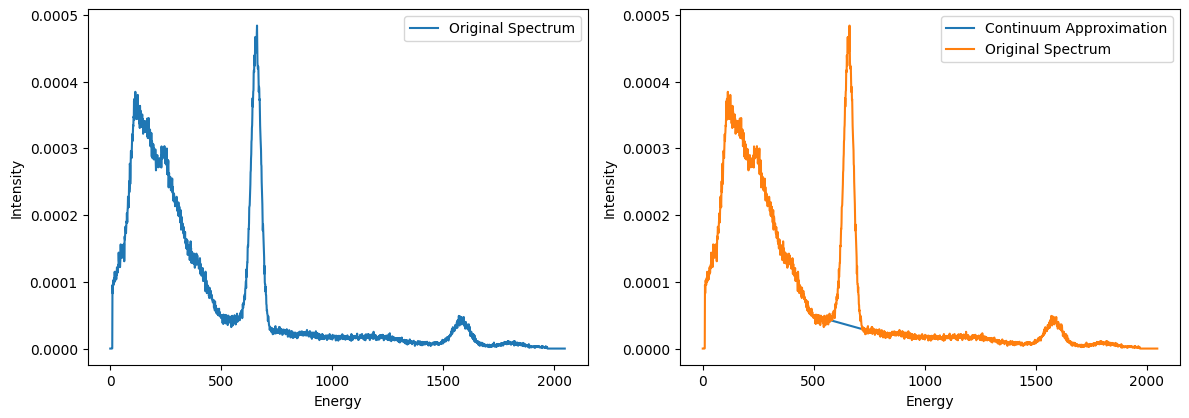

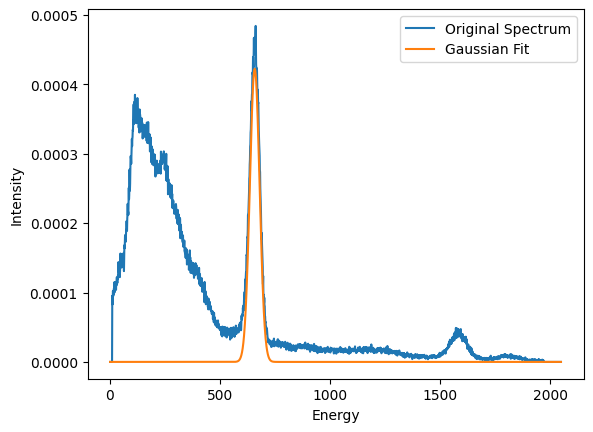

In [91]:
x=np.linspace(1,2048,2048)


x=x
energy=x
Na22clean=Na22clean
intensity=Na22clean


def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean)**2 / (2 * stddev**2))

Ca_index = 500
Cb_index = 750

Ca_intensity = intensity[Ca_index]
Cb_intensity = intensity[Cb_index]

continuum_slope = (Cb_intensity - Ca_intensity) / (Cb_index - Ca_index)

continuum_approximation = Ca_intensity + continuum_slope * (energy - energy[Ca_index])
continuum_approximation[:Ca_index] = 0
continuum_approximation[Cb_index:] = 0

subtracted_spectrum = intensity - continuum_approximation
subtracted_spectrum[:Ca_index] = 0
subtracted_spectrum[Cb_index:] = 0

initial_params = [np.max(subtracted_spectrum), (Ca_index + Cb_index) / 2, 1.0]
fit_params, cov = curve_fit(gaussian, energy, subtracted_spectrum, p0=initial_params)
amplitude_fit, mean_fit, stddev_fit = fit_params
gaussian_fit = gaussian(energy, amplitude_fit, mean_fit, stddev_fit)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(energy[Ca_index:Cb_index], continuum_approximation[Ca_index:Cb_index], label='Continuum Approximation')
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

# Subtracted Spectrum
#plt.subplot(2, 2, 3)
#plt.plot(energy, subtracted_spectrum, label='Subtracted Spectrum')
#plt.xlabel('Energy')
#plt.ylabel('Intensity')
#plt.legend()
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, gaussian_fit, label='Gaussian Fit')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()
plt.show()

Sodio picco 2

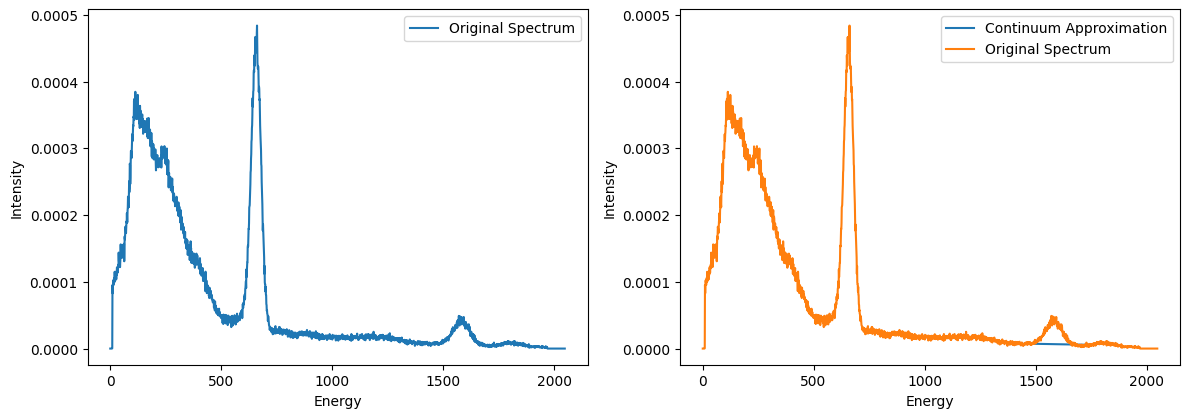

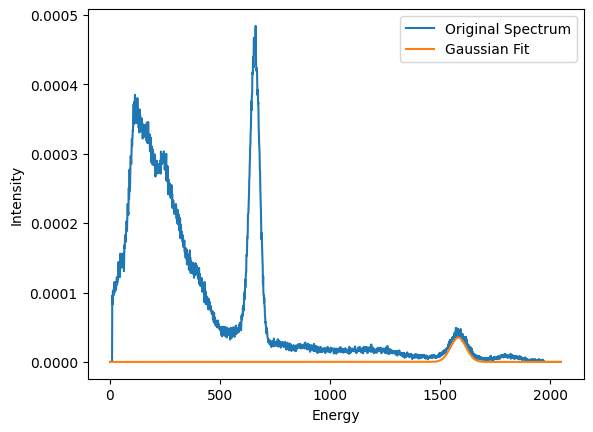

In [94]:
x=np.linspace(1,2048,2048)


x=x
energy=x
Na22clean=Na22clean
intensity=Na22clean


def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean)**2 / (2 * stddev**2))

Ca_index = 1450
Cb_index = 1750

Ca_intensity = intensity[Ca_index]
Cb_intensity = intensity[Cb_index]

continuum_slope = (Cb_intensity - Ca_intensity) / (Cb_index - Ca_index)

continuum_approximation = Ca_intensity + continuum_slope * (energy - energy[Ca_index])
continuum_approximation[:Ca_index] = 0
continuum_approximation[Cb_index:] = 0

subtracted_spectrum = intensity - continuum_approximation
subtracted_spectrum[:Ca_index] = 0
subtracted_spectrum[Cb_index:] = 0

initial_params = [np.max(subtracted_spectrum), (Ca_index + Cb_index) / 2, 1.0]
fit_params, cov = curve_fit(gaussian, energy, subtracted_spectrum, p0=initial_params)
amplitude_fit, mean_fit, stddev_fit = fit_params
gaussian_fit = gaussian(energy, amplitude_fit, mean_fit, stddev_fit)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(energy[Ca_index:Cb_index], continuum_approximation[Ca_index:Cb_index], label='Continuum Approximation')
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

# Subtracted Spectrum
#plt.subplot(2, 2, 3)
#plt.plot(energy, subtracted_spectrum, label='Subtracted Spectrum')
#plt.xlabel('Energy')
#plt.ylabel('Intensity')
#plt.legend()
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, gaussian_fit, label='Gaussian Fit')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()
plt.show()

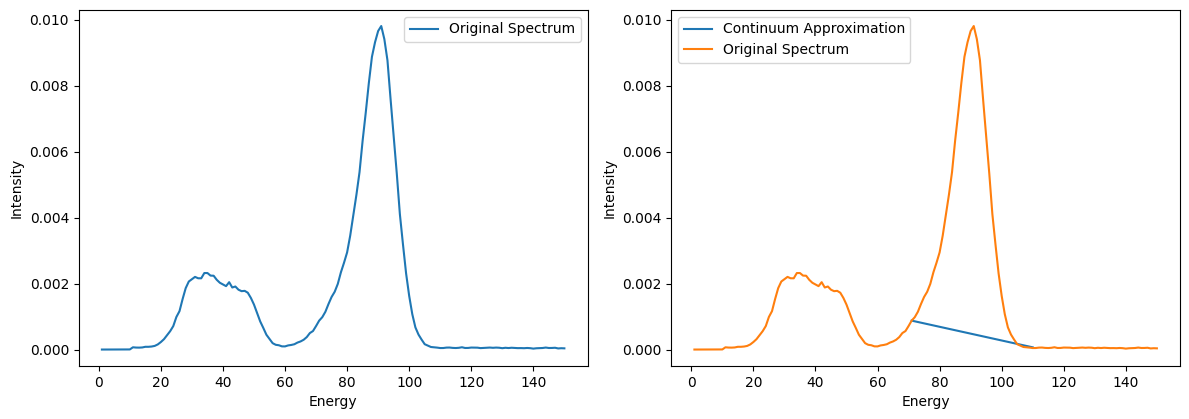

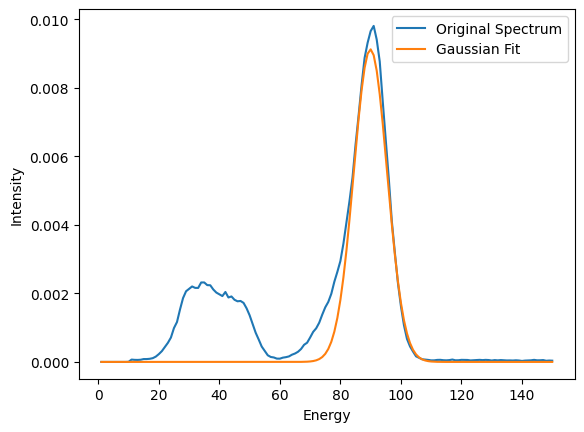

In [66]:
x=np.linspace(1,2048,2048)


x=x[0:150]
energy=x
Am241cal_norm=Am241cal_norm[0:150]
intensity=Am241cal_norm


def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean)**2 / (2 * stddev**2))

Ca_index = 70
Cb_index = 110

Ca_intensity = intensity[Ca_index]
Cb_intensity = intensity[Cb_index]

continuum_slope = (Cb_intensity - Ca_intensity) / (Cb_index - Ca_index)

continuum_approximation = Ca_intensity + continuum_slope * (energy - energy[Ca_index])
continuum_approximation[:Ca_index] = 0
continuum_approximation[Cb_index:] = 0

subtracted_spectrum = intensity - continuum_approximation
subtracted_spectrum[:Ca_index] = 0
subtracted_spectrum[Cb_index:] = 0

initial_params = [np.max(subtracted_spectrum), (Ca_index + Cb_index) / 2, 1.0]
fit_params, cov = curve_fit(gaussian, energy, subtracted_spectrum, p0=initial_params)
amplitude_fit, mean_fit, stddev_fit = fit_params
gaussian_fit = gaussian(energy, amplitude_fit, mean_fit, stddev_fit)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(energy[Ca_index:Cb_index], continuum_approximation[Ca_index:Cb_index], label='Continuum Approximation')
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

# Subtracted Spectrum
#plt.subplot(2, 2, 3)
#plt.plot(energy, subtracted_spectrum, label='Subtracted Spectrum')
#plt.xlabel('Energy')
#plt.ylabel('Intensity')
#plt.legend()
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, gaussian_fit, label='Gaussian Fit')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()
plt.show()

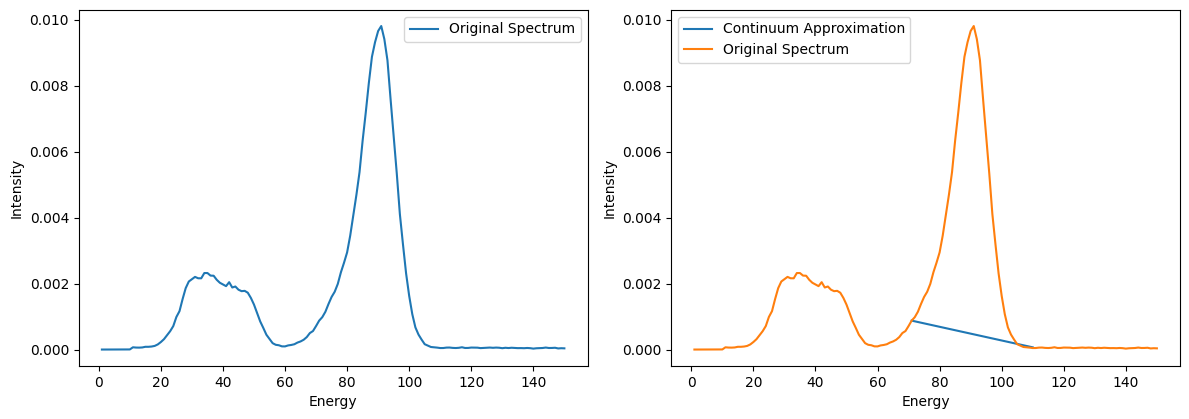

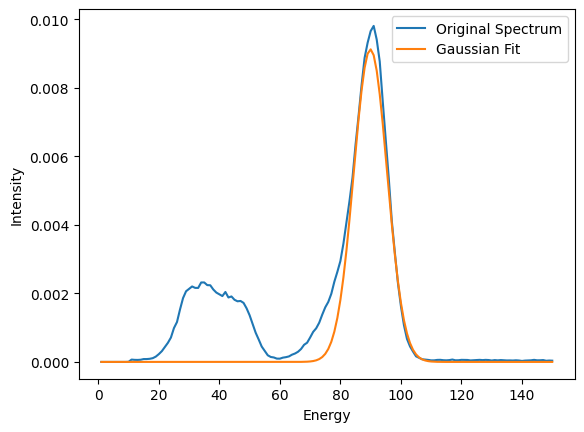

In [67]:
x=np.linspace(1,2048,2048)


x=x[0:150]
energy=x
Am241cal_norm=Am241cal_norm[0:150]
intensity=Am241cal_norm


def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean)**2 / (2 * stddev**2))

Ca_index = 70
Cb_index = 110

Ca_intensity = intensity[Ca_index]
Cb_intensity = intensity[Cb_index]

continuum_slope = (Cb_intensity - Ca_intensity) / (Cb_index - Ca_index)

continuum_approximation = Ca_intensity + continuum_slope * (energy - energy[Ca_index])
continuum_approximation[:Ca_index] = 0
continuum_approximation[Cb_index:] = 0

subtracted_spectrum = intensity - continuum_approximation
subtracted_spectrum[:Ca_index] = 0
subtracted_spectrum[Cb_index:] = 0

initial_params = [np.max(subtracted_spectrum), (Ca_index + Cb_index) / 2, 1.0]
fit_params, cov = curve_fit(gaussian, energy, subtracted_spectrum, p0=initial_params)
amplitude_fit, mean_fit, stddev_fit = fit_params
gaussian_fit = gaussian(energy, amplitude_fit, mean_fit, stddev_fit)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(energy[Ca_index:Cb_index], continuum_approximation[Ca_index:Cb_index], label='Continuum Approximation')
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

# Subtracted Spectrum
#plt.subplot(2, 2, 3)
#plt.plot(energy, subtracted_spectrum, label='Subtracted Spectrum')
#plt.xlabel('Energy')
#plt.ylabel('Intensity')
#plt.legend()
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, gaussian_fit, label='Gaussian Fit')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()
plt.show()

TO do :
Linearità ale e basse energie
Calibrazione
Risoluzione